![alt text](https://anvaqta.id/headerai.jpg)

# Arsitektur Populer

---
# ImageNet
![alt text](https://miro.medium.com/max/2442/1*jUn4ojyEVxqPdM-vDV63IA.png)

ImageNet adalah sebuah project yang bertujuan melabeli dan mengkategorikan gambar kedalam 22.000 kategori yang telah ditentukan. Dalam peroyek ImageNet terdapat 14 juta gambar sebagai datasetnya.

Proyek ImageNet dimulai pada tahun 2010 dan berakhir pada tahun 2017 karena akurasinya yang sudah melebihi manusia dalam mengklasifikasi objek pada gambar, yaitu hingga **99%** atau error **0.023%**

---
# Import Library Cuy

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 47kB/s 
     |████████████████████████████████| 3.8MB 38.5MB/s 
     |████████████████████████████████| 450kB 50.8MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2

from tensorflow.keras.utils import to_categorical, plot_model

---
# Dataset

---
## Load Cifar-10

In [4]:
(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 3s 0us/step


---
## Bagi Data Validasi dan Data Train

In [0]:
X_val_ori = X_train_ori[-1000:,:]
y_val = y_train[-1000:]

X_train_ori = X_train_ori[:-1000,:]
y_train = y_train[:-1000]

---
## Preprocess Dataset
Jadikan dataset sebagai zero-center lalu bagi dengan standa deviasinya

In [6]:
X_train = X_train_ori.astype('float32')
X_val   = X_val_ori.astype('float32')
X_test  = X_test_ori.astype('float32')

mean_image = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_image = X_train.std(axis=(0, 1, 2), keepdims=True)

X_train = (X_train - mean_image) /std_image
X_val = (X_val - mean_image) /std_image
X_test = (X_test - mean_image) /std_image

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

y_train = y_train.ravel()
y_val   = y_val.ravel()
y_test  = y_test.ravel()

print('\ny_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49000, 32, 32, 3)
X_val.shape   = (1000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)

y_train.shape = (49000,)
y_val.shape   = (1000,)
y_test.shape  = (10000,)


---
## One Hot Matriks

In [7]:
# jadikan y_train, y_val dan y_test menjadi one hot matrix menggunakan to_categorical
y_train_hot = to_categorical(y_train, 10)
y_val_hot   = to_categorical(y_val, 10)
y_test_hot  = to_categorical(y_test, 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (49000, 10)
y_val_hot.shape   = (1000, 10)
y_test_hot.shape  = (10000, 10)


---
# Let's Start Build Our Model

---
## VGG Net (2014)

Simplicity and depth, that's what this network is.

[VGG Net](http://arxiv.org/pdf/1409.1556v6.pdf) is one of the most influential papers because it reinforced the notion that convolutional neural networks have to have a deep network of layers in order for this hierarchical representation of visual data to work. 

It placed 2nd in ILSVRC 2014 with its 7.3% error rate.

<br>


<center>
<img src='http://www.sanko-shoko.net/note.php?img=y1kl'  width=700px>
  
  </center>
  
  





The network that was submitted to the competition consist of **5 convolution blocks** and **3 fc layers**. 
<pre>
Keep it deep. Keep it simple.
* Each convolution layer uses a <b>3x3</b> filter and <b>padding=1 </b> (same).
* Each convolution block ends with maxpooling <b>2x2</b>
* Each layer uses relu activation
</pre>

<center>
  <img src='https://www.yjpark.me/assets/expressions/VGG-config.png' width=50%>
</center>

There are **5 variations** of the network submitted, each with different number of convolution layers in the convolution block. 

Each network variation is known by name according to the number of actual layers in the network. 

    E.g.
    * VGG16 has 16 layers (13 conv + 3 fc),
    * VGG19 has 19 layers (16 conv + 3 fc)
    

### Buat Model VGG

In [0]:
def vgg16():
    return Sequential([
        
        # 1-2 (block 1)
        # conv-conv-pool
        # Layer Conv2D dengan 64 neuron, 3x3 filter, aktivasi relu, padding same dan input_shape 224,224,3
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
        # Layer Conv2D dengan 64 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(64, (3,3), activation='relu', padding='same'),
        # MaxPooling2D dengan 2x2 filter
        MaxPooling2D((2,2)),

        # 3-4 (block 2)
        # conv-conv-pool
        # Layer Conv2D dengan 128 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(128, (3,3), activation='relu', padding='same'),
        # Layer Conv2D dengan 128 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(128, (3,3), activation='relu', padding='same'),
        # MaxPooling2D dengan 2x2 filter
        MaxPooling2D((2,2)),

        # 5-7 (block 3)
        # conv-conv-conv-pool
        # Layer Conv2D dengan 256 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(256, (3,3), activation='relu', padding='same'),
        # Layer Conv2D dengan 256 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(256, (3,3), activation='relu', padding='same'),
        # Layer Conv2D dengan 256 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(256, (3,3), activation='relu', padding='same'),
        # MaxPooling2D dengan 2x2 filter
        MaxPooling2D((2,2)),
        
        # 8-10 (block 4)
        # conv-conv-conv-pool
        # Layer Conv2D dengan 512 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(512, (3,3), activation='relu', padding='same'),
        # Layer Conv2D dengan 512 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(512, (3,3), activation='relu', padding='same'),
        # Layer Conv2D dengan 512 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(512, (3,3), activation='relu', padding='same'),
        # MaxPooling2D dengan 2x2 filter
        MaxPooling2D((2,2)),

        # 11-13 (block 5)
        # conv-conv-conv-pool
        # Layer Conv2D dengan 512 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(512, (3,3), activation='relu', padding='same'),
        # Layer Conv2D dengan 512 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(512, (3,3), activation='relu', padding='same'),
        # Layer Conv2D dengan 512 neuron, 3x3 filter, aktivasi relu, padding same
        Conv2D(512, (3,3), activation='relu', padding='same'),
        # MaxPooling2D dengan 2x2 filter
        MaxPooling2D((2,2)),

        # 14
        # flatten-dense-dropout
        Flatten(),
        # Dense 4096 neuron dan aktivasi relu
        Dense(4096, activation='relu'),
        # Dropout 0.5
        Dropout(0.5),

        # 15
        # dense-dropout
        # Dense 4096 neuron dan aktivasi relu
        Dense(4096, activation='relu'),
        # Dropout 0.5
        Dropout(0.5),
        
        # 16
        # dense 1000, aktivasi softmax
        Dense(1000, activation='softmax')

    ], name='vgg16')


In [9]:
model_vgg = vgg16()

model_vgg.summary() 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       295168

---
### Lihat Bentuk Arsitur VGG16

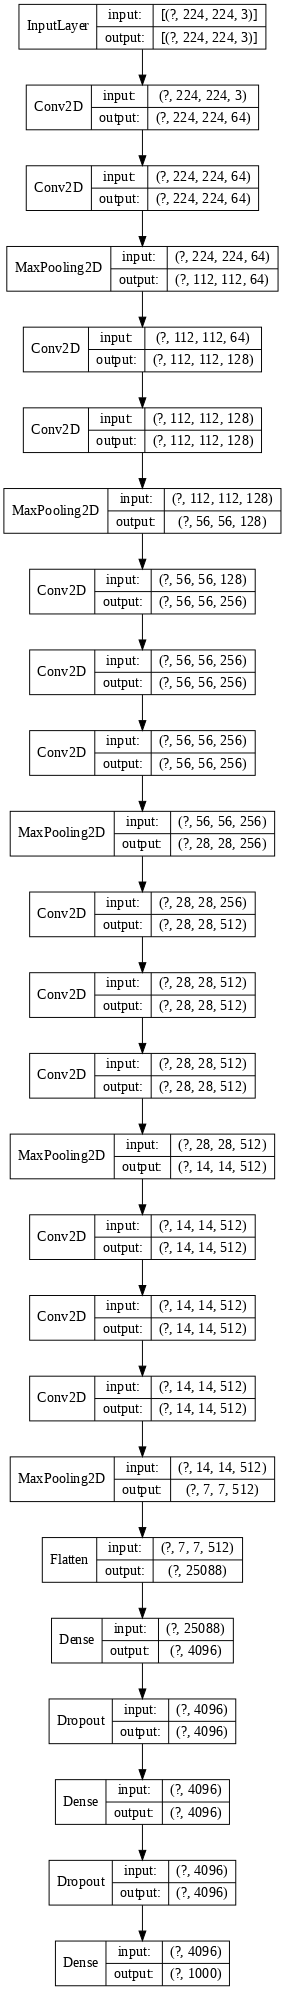

In [10]:
plot_model(model_vgg, 
           to_file=model_vgg.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TD',
           dpi=70
          )

---
## GoogLeNet (2014)

[GoogLeNet](http://arxiv.org/abs/1512.00567) was one of the first models that introduced the idea that CNN layers didn’t always have to be stacked up sequentially. 

Coming up with the **Inception module**, the authors showed that a creative structuring of layers can lead to improved performance and computationally efficiency. The authors of the paper emphasized that this new model places notable consideration on memory and power usage.

This paper has really set the stage for some amazing architectures that we could see in the coming years.

<img src='https://adeshpande3.github.io/assets/GoogLeNet.png'>

The original GoogLeNet uses 9 Inception Module with equivalent with over 100 layers

**That's DEEP**

open this [link](https://adeshpande3.github.io/assets/GoogleNet.gif) to see the detailed gif of the network
<center>
<img src='https://adeshpande3.github.io/assets/GoogleNet.gif' width=30%>

---
### Inception Module

Building an Inception Module is quite hairy so let's just build the small version for our CIFAR-10

The inception module consist of 4 branches (also called tower) which incorporate three different types of convolution and pooling

<center>
<img src='https://miro.medium.com/max/1108/1*sezFsYW1MyM9YOMa1q909A.png'>
  
</center>

To implement it using TensorFlow and Keras, it's better if you use Functional API modelling

---
### Buat Modul Inception

In [0]:
from tensorflow.keras.layers import concatenate

def inception(x, nF):
    '''
    inputs:
    - x : input tensor
    - nF: number of convolution filter

    '''
    # Layer Conv2D dengan jumlah neuron nF, 1x1 filter, fungsi aktivasi relu, padding same ditempel dengan x
    tower_0 = Conv2D(nF, (1,1), activation='relu', padding='same')(x)
    
    # Layer Conv2D dengan neuron nF, filter 1x1, aktivasi relu, padding same ditempel dengan x
    tower_1 = Conv2D(nF, (1,1), activation='relu', padding='same')(x)
    # Layer Conv2D dengan neuron nF, filter 3x3, aktivasi relu, padding same ditempel dengan tower_1
    tower_1 = Conv2D(nF, (3,3), activation='relu', padding='same')(tower_1)

    # Layer Conv2D dengan neuron nF, filter 1x1, aktivasi relu, padding same ditempel dengan x
    tower_2 = Conv2D(nF, (1,1), activation='relu', padding='same')(x)
    # Layer Conv2D dengan neuron nF, filter 5x5, aktivasi relu, padding same, ditempel dengan tower_2
    tower_2 = Conv2D(nF, (5,5), activation='relu', padding='same')(tower_2)

    # Layer MaxPooling2D dengan filter 3x3, strides 1, padding same ditempel dengan x
    tower_3 = MaxPooling2D((3,3), strides=1, padding='same')(x)
    # Layer Conv2D dengan neuron nF, filter 1x1, aktivasi relu, padding same ditempel dengan tower_3
    tower_3 = Conv2D(nF, (1,1), activation='relu', padding='same')(tower_3)
    
    output = concatenate([tower_0, tower_1, tower_2, tower_3], axis = 3)
    
    return output

---
### Buat Model GoogLe Net

In [0]:
def googlenet_small():
    
    # Input layer
    input_img = Input(shape = (32, 32, 3))
    
    # Layer Conv2D dengan 32 filter berukuran 3x3, aktivasi relu, padding same, input shape 32x32x3 ditempel dengan input_img
    x = Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3))(input_img)
    
    # inception module dengan input x dan 32 filter
    x = inception(x, 32)
  
    # inception module dengan input x dan 64 filter
    x = inception(x, 64)
    
    # max pool dengan 3x3 filter, strides 1, padding same ditempel dengan x
    x = MaxPooling2D((3,3), strides=1)(x)
    
    # 2x inception module dengan input x and 128 filter
    x = inception(x, 128)
    x = inception(x, 128)
    
    # global average pooling ditempel dengan x
    x = GlobalAveragePooling2D()(x)
  
    # output dense sebanyak 10 kelas dengan aktivasi softmax ditempel dengan x
    out = Dense(10, activation='softmax')(x)

    model = Model(inputs = input_img, outputs = out, name='googlenet_small')
    
    return model


In [17]:
model_googlenet = googlenet_small()

model_googlenet.summary()  

Model: "googlenet_small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 32, 32, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 32)   1056        conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 32, 32, 32)   1056        conv2d_21[0][0]                  
____________________________________________________________________________________

---
### Lihat Bentuk Arsitektur GoogLe Net

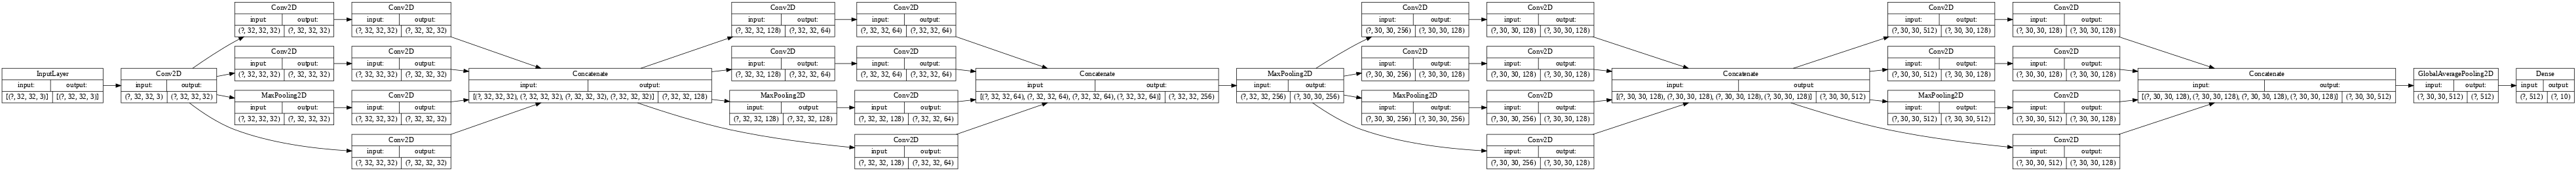

In [18]:
plot_model(model_googlenet, 
           to_file=model_googlenet.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=55
          )

---
## Residual Network (2015)

3.6% error rate. That itself should be enough to convince you. 

The [ResNet](https://arxiv.org/abs/1512.03385) model is the best CNN architecture that we currently have and is a great innovation for the idea of residual learning. 

ResNet is a new 152-layer network architecture that Microsoft Research Asia came up with in late 2015, which set new records in classification, detection, and localization through one incredible architecture


<img src='https://adeshpande3.github.io/assets/ResNet.gif' width=300px>

---
### Buat Modul Resnet

In [0]:
def resnet_layer(inputs, 
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    
    # conv layer
    conv = Conv2D(filters=num_filters, 
                  kernel_size=kernel_size,
                  strides=strides, 
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4)
                 )

    x = inputs
    
    # if conv_first is true, x = conv (x)
    if conv_first:
        x = conv(x)
        
    # if batch_normalization is true, x = BatchNormalization() (x)
    if batch_normalization:
        x = BatchNormalization()(x)
        
    # if activation is not None, x = Activation(activation) (x)
    if activation != None:
        x = Activation(activation)(x)
    
    # if conv_first is false, x = conv (x)
    if not conv_first:
        x = conv(x)
        
    return x

---
### Buat Model ResNet

In [0]:
def resnet_small(depth = 20):
  
    input_shape = (32, 32, 3)
    
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    # add Input layer
    inputs = Input(shape=input_shape)
    
    # call resnet_layer funtion with inputs=inputs
    x = resnet_layer(inputs)
    
    # Instantiate the stack of residual units
    for stack in range(3):
      
        for res_block in range(num_res_blocks):
            
            strides = 1
            
            # check if it is the first layer but not first stack
            if stack > 0 and res_block == 0:
                # downsample for the first layer
                strides = 2
                
            # call resnet_layer function with inputs = x, 
            # num_filters=num_filters, and strides=strides
            y = resnet_layer(x, num_filters=num_filters, strides=strides)
            
            # call resnet_layer function with inputs = y, 
            # num_filters=num_filters, and activation=None
            y = resnet_layer(y, num_filters=num_filters, activation=None)            
            
            # check if it is the first layer but not first stack
            if stack > 0 and res_block == 0:  
                # linear projection residual shortcut connection to match
                # changed dims
              
                # call resnet_layer function with inputs = x,
                # num_filters=num_filters, kernel_size=1, 
                # strides=strides, activation=None, 
                # and batch_normalization=False
                x = resnet_layer(x, num_filters=num_filters, kernel_size=1, strides=strides, activation=None, batch_normalization=False)
                
            # add layer output with the skip connection
            x = tf.keras.layers.add([x, y])
        
            # add relu activation
            x = Activation('relu')(x)
            
        # double the number of filter
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU    
    x = AveragePooling2D(pool_size=8)(x)
    
    # flatten the output average
    y = Flatten()(x)
    
    # create output dense of 10 class with softmax activation
    outputs = Dense(10,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name='resnet_small')
    return model

In [21]:
model_resnet = resnet_small()

model_resnet.summary()

Model: "resnet_small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 32, 32, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d_46[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

---
### Lihat Bentuk Arsitektur ResNet

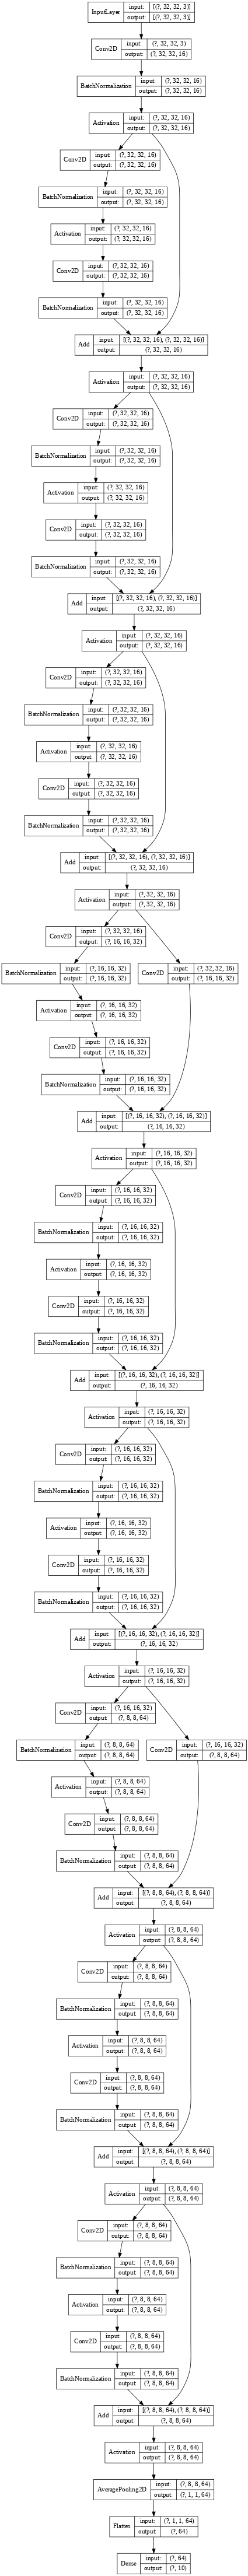

In [22]:
plot_model(model_resnet, 
           to_file=model_resnet.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB',
           dpi=55
          )

---
# Proses Training Diserahkan Ke Peserta

*copyright © 2019 Artificial intelligence laboratory all right reserved.*